In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')

# List of file paths and their corresponding stock symbols
# JNJ <- Johnson and Johnson 
# PFE <- Pzifer
# ABT <- Abbot Labs

file_paths = {
    'JNJ': r'C:\Users\15612\Downloads\JNJ.csv',
    'PFE': r'C:\Users\15612\Downloads\PFE.csv',
    'ABT': r'C:\Users\15612\Downloads\ABT.csv'
}

# Function to read a CSV file into a DataFrame and select the 'Close' column
def read_stock_data(file_path):
    try:
        df = pd.read_csv(file_path, index_col='Date', parse_dates=True)
        return df[['Close']].rename(columns={'Close': os.path.basename(file_path).split('.')[0]})
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        return None

# Read all CSV files into a dictionary of DataFrames
stock_data = {symbol: read_stock_data(path) for symbol, path in file_paths.items()}

# Remove any None values or NaN from the dictionary (files that were not found)
stock_data = {symbol: df for symbol, df in stock_data.items() if df is not None}

# Concatenate DataFrames into a single DataFrame IMPORTANT FUNCTION! 
stocks = pd.concat(stock_data.values(), axis=1)

# Display the first 10 rows of the combined DataFrame
n = 10
print(stocks.head(n))









                   JNJ        PFE         ABT
Date                                         
2023-06-26  163.630005  36.889999  108.510002
2023-06-27  163.289993  36.419998  107.790001
2023-06-28  162.960007  36.290001  107.610001
2023-06-29  164.100006  36.119999  107.660004
2023-06-30  165.520004  36.680000  109.019997
2023-07-03  163.350006  36.650002  107.220001
2023-07-05  162.809998  36.459999  107.370003
2023-07-06  161.600006  35.630001  107.199997
2023-07-07  159.250000  35.529999  106.349998
2023-07-10  159.509995  35.680000  107.019997


In [5]:
# Calculating Mean Daily Returns for ALL STOCKS

mean_daily_return = stocks.pct_change(1).mean(1)
mean_daily_return

# Parameter (1) indicates that the change in percentage is being calculated by day
# Parameter (1) indicates that the mean return value is calculated across columns by each row
# NaN means Not A Number and it refers to missing  data in the DF 



Date
2023-06-26         NaN
2023-06-27   -0.007151
2023-06-28   -0.002420
2023-06-29    0.000925
2023-06-30    0.012263
                ...   
2024-06-17   -0.006460
2024-06-18    0.006367
2024-06-20    0.017158
2024-06-21   -0.000471
2024-06-24    0.007528
Length: 251, dtype: float64

In [6]:
stocks.pct_change(1).corr()

# It Measures the strength and direction of the linear relationship between two variables (Correlation Matrix)
# Correlation = Cov(x,y)/sd(x) * sd(y)
# Negative Values are not strong at all, 0 Values are neutral and Positive Values are strong


,JNJ,PFE,ABT
JNJ,1.000000,0.363211,0.416534
PFE,0.363211,1.000000,0.170376
ABT,0.416534,0.170376,1.000000


<Axes: xlabel='Date'>

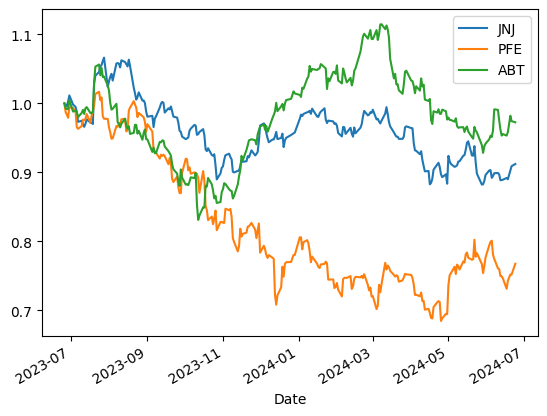

In [7]:
# Simulating large amounts of allocations 

stock_normed = stocks/stocks.iloc[0] # iloc[] is integer position based from 0 to 1
stock_normed.plot()


In [8]:
# Calculating percentage change in between 1 day

stock_daily_return = stocks.pct_change(1)  
n = 10
stock_daily_return.head(n)

,JNJ,PFE,ABT
Date,,,
2023-06-26,NaN,NaN,NaN
2023-06-27,-0.002078,-0.012741,-0.006635
2023-06-28,-0.002021,-0.003569,-0.001670
2023-06-29,0.006996,-0.004685,0.000465
2023-06-30,0.008653,0.015504,0.012632
2023-07-03,-0.013110,-0.000818,-0.016511
2023-07-05,-0.003306,-0.005184,0.001399
2023-07-06,-0.007432,-0.022765,-0.001583
2023-07-07,-0.014542,-0.002807,-0.007929


In [9]:
# Log Returns vs Arithmatic Returns, using logs is a nicer way of normalizing series 

log_returns = np.log(stocks/stocks.shift(1))  # shift(1) is one period or day backward along the index axis
n = 10
log_returns.head(n)

NameError: name 'np' is not defined

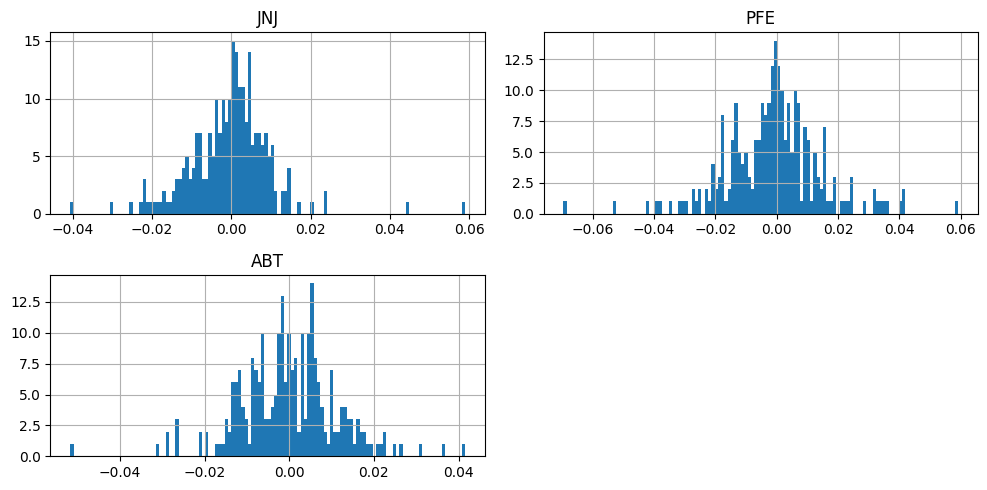

In [51]:
log_returns.hist(bins=120,figsize=(10,5));
plt.tight_layout()

In [52]:
# Transposing Correlation Matrix 
log_returns.describe().transpose()  

# describe() is a statistical summary
# transpose() flips rows and columns


,count,mean,std,min,25%,50%,75%,max
JNJ,250.0,-0.000368,0.010179,-0.040648,-0.005282,0.000439,0.004640,0.058956
PFE,250.0,-0.001058,0.015607,-0.069543,-0.010327,-0.000799,0.006518,0.059108
ABT,250.0,-0.000111,0.011468,-0.051747,-0.007295,-0.000190,0.006179,0.041538


In [53]:
log_returns.mean()*252 # Times 252 is arbitrarty, it could vary based on trading days


JNJ   -0.092653
PFE   -0.266491
ABT   -0.028022
dtype: float64

In [54]:
log_returns.cov() # Now we are performing the Pairwise Covariance of columns 



,JNJ,PFE,ABT
JNJ,0.000104,0.000057,0.000048
PFE,0.000057,0.000244,0.000030
ABT,0.000048,0.000030,0.000132


In [55]:
log_returns.cov()*252 

,JNJ,PFE,ABT
JNJ,0.026110,0.014405,0.012187
PFE,0.014405,0.061378,0.007630
ABT,0.012187,0.007630,0.033144


In [60]:
print('Stocks')
print(stock_data)
print('\n')  # It outputs a blank line for better code organization

print('Creating Random Weights')
weights = np.array(np.random.random(3))
print(weights)
print('\n') 

print('Rebalance to sum to 1.0')
weights = weights/np.sum(weights)
print(weights)
print('\n')

print('Expected Portafolio Return')
exp_returns = np.sum(log_returns.mean() * weights) * 252 
print(exp_returns)
print('\n')

print('Expected Volatility')
exp_volatility = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov() * 252, weights)))
print(exp_volatility)
print('\n')

# Sharp Ratio. Measures performance of an invesment (if n > 2 = very good, if n < 1, very bad)
SR = exp_returns/exp_volatility
print('Sharp Ratio')
print(SR)

# Sharp Ratio ended up being negative, this is REALLY bad LMAO


Stocks
{'JNJ':                    JNJ
Date                  
2023-06-26  163.630005
2023-06-27  163.289993
2023-06-28  162.960007
2023-06-29  164.100006
2023-06-30  165.520004
...                ...
2024-06-17  145.949997
2024-06-18  145.649994
2024-06-20  147.779999
2024-06-21  148.750000
2024-06-24  149.259995

[251 rows x 1 columns], 'PFE':                   PFE
Date                 
2023-06-26  36.889999
2023-06-27  36.419998
2023-06-28  36.290001
2023-06-29  36.119999
2023-06-30  36.680000
...               ...
2024-06-17  26.980000
2024-06-18  27.410000
2024-06-20  27.740000
2024-06-21  27.740000
2024-06-24  28.319901

[251 rows x 1 columns], 'ABT':                    ABT
Date                  
2023-06-26  108.510002
2023-06-27  107.790001
2023-06-28  107.610001
2023-06-29  107.660004
2023-06-30  109.019997
...                ...
2024-06-17  103.449997
2024-06-18  103.989998
2024-06-20  106.570000
2024-06-21  105.720001
2024-06-24  105.535004

[251 rows x 1 columns]}


Creating R

In [65]:
num_rep = 1000 
all_weights = np.zeros((num_rep, len(stock_data)))
ret_arr = np.zeros(num_rep)
volt_arr = np.zeros(num_rep)
sharp_arr = np.zeros(num_rep)

for ind in range(num_rep): 
    weights = np.array(np.random.random(3))
    weights = weights/np.sum(weights)
    all_weights[ind,:] = weights 
    ret_arr[ind] = np.sum((log_returns.mean()*weights)*252)
    volt_arr[ind] = np.sqrt(np.dot(weights.T, np.dot(log_returns.cov()*252, weights)))
    sharp_arr[ind]= ret_arr[ind]/volt_arr[ind]
    
s1 = sharp_arr.max()  # Returns Maximum Value inside the array 
print(s1)
s2 = sharp_arr.argmax()
print(s2)

aw = all_weights[s2, :]
print(aw)



-0.22611773027095702
353
[0.10830056 0.01304681 0.87865263]


In [3]:
#Plotting Data 

plt.figure(figsize=(10,5))
plt.scatter(volt_arr,ret_arr,c=sharp_arr,cmap='coolwarm')
plt.colorbar(label='Sharp Ratio')
plt.xlabel('Volatility')
plt.ylabel('Expected Returns')



NameError: name 'plt' is not defined

In [ ]:
# The Strategy Allocation will not generate adequate returns for the level of Risk Taken
# High Volatility relative to Expected Returns will lead to a negative Sharp Ratio 
# Investments are ultimately UNDERPERFORMING
# US bank declared that Healthcare Stocks underperformed significantly last year and beginning of this year